In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
df = pd.read_csv("Anime.csv")

In [3]:
print(df.shape)
df.head()

(18495, 17)


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [4]:
df = df[df['Rank']<=1500]

In [5]:
cols_to_drop = ['Rank', 'Japanese_name','Type', 'Episodes','Release_season','Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff', 'Studio']

df.drop(cols_to_drop, inplace=True, axis=1)

In [6]:
df.isnull().sum()

Name    0
Tags    2
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Name    0
Tags    0
dtype: int64

In [8]:
df.rename(columns={'Tags' : 'Genres'}, inplace=True)

In [9]:
df.head(10)

,Name,Genres
0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,"Action, Adventure, Fantasy, Shounen, Demons, H..."
1,Fruits Basket the Final Season,"Drama, Fantasy, Romance, Shoujo, Animal Transf..."
2,Mo Dao Zu Shi 3,"Fantasy, Ancient China, Chinese Animation, Cul..."
3,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Mystery, Sh..."
4,Attack on Titan 3rd Season: Part II,"Action, Fantasy, Horror, Shounen, Dark Fantasy..."
5,Jujutsu Kaisen,"Action, Horror, Shounen, Curse, Exorcists, Mon..."
6,Attack on Titan The Final Season: Part II,"Action, Drama, Fantasy, Horror, Shounen, Dark ..."
7,Attack on Titan The Final Season,"Action, Drama, Fantasy, Horror, Shounen, Dark ..."
8,Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...,"Action, Drama, Fantasy, Shounen, Demons, Histo..."
9,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Shounen, Sports, Animeism, School Club, School..."


In [23]:
df.to_csv("Anime-preprocessed.csv",index=False)

## Vectorize text using TFxIDF algorithm and finding the best n_components for PCA

In [24]:
# Custom tokenizer to split genres based on commas
def custom_tokenizer(text):
    return text.split(', ')

# TF-IDF vectorization for 'Genres' column
vectorizer_genres = TfidfVectorizer(stop_words='english', tokenizer=custom_tokenizer)
genres_tfidf = vectorizer_genres.fit_transform(df['Genres'])
genres_tfidf_df = pd.DataFrame(genres_tfidf.toarray(), columns=vectorizer_genres.get_feature_names_out())

# List of top 10 genres by popularity in animes
top_genres_list = ['action', 'adventure', 'romance', 'comedy', 'magic', 'sci fi', 'seinen', 'shounen', 'sports', 'fantasy']

# Filter columns based on the top genres list
genres_tfidf_df = genres_tfidf_df[top_genres_list]

/home/arvn/datageek/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Scaling the vectorized data

In [25]:
# Separate data for Model 1 (Genres)
data1 = genres_tfidf_df.values

# Standardize the data for Model 1
scaler_model1 = StandardScaler()
scaled_data_model1 = scaler_model1.fit_transform(data1)

### Searching for the best PCA n_components possible

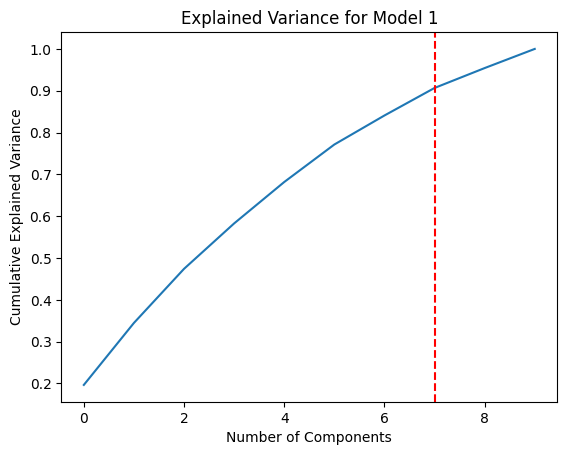

In [26]:
# Apply PCA for dimensionality reduction for Model 1
pca_model1 = PCA()
model1_data = pca_model1.fit_transform(scaled_data_model1)
explained_variance_ratio_model1 = np.cumsum(pca_model1.explained_variance_ratio_)
plt.plot(explained_variance_ratio_model1)
plt.axvline(x=np.argmax(explained_variance_ratio_model1 >= 0.9), color='r', linestyle='--', label='90% Variance')
plt.title('Explained Variance for Model 1')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [27]:
genres_tfidf_df

,action,adventure,romance,comedy,magic,sci fi,seinen,shounen,sports,fantasy
0,0.152708,0.239988,0.000000,0.000000,0.000000,0.000000,0.0,0.173605,0.0,0.177563
1,0.000000,0.000000,0.144118,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.117895
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.214795
3,0.125426,0.197112,0.000000,0.000000,0.000000,0.000000,0.0,0.142589,0.0,0.145840
4,0.133561,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.151837,0.0,0.155299
...,...,...,...,...,...,...,...,...,...,...
1461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.170768,0.0,0.174662
1462,0.147258,0.000000,0.000000,0.000000,0.253245,0.214741,0.0,0.000000,0.0,0.171226
1463,0.000000,0.000000,0.000000,0.220936,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1464,0.339631,0.533744,0.000000,0.000000,0.000000,0.000000,0.0,0.386105,0.0,0.000000


### Re-defined n components in PCA after seeing visualization

In [28]:
# Apply PCA for dimensionality reduction for Model 1
pca_model1 = PCA(n_components=7)
model1_data = pca_model1.fit_transform(scaled_data_model1)

## Finding best n_clusters with elbow and shiloutte scores method

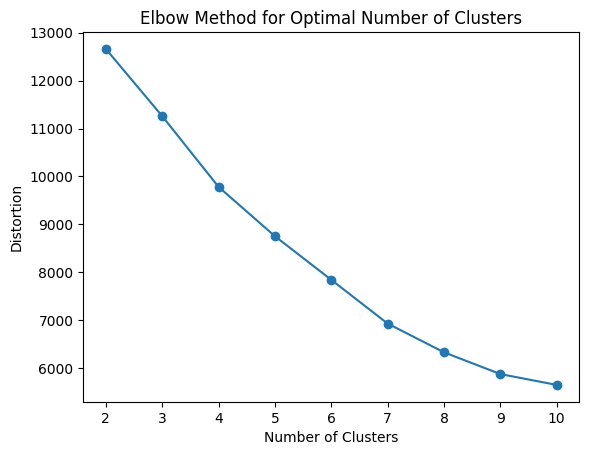

In [29]:
# Function to find the optimal number of clusters using the elbow method
def find_optimal_clusters(data):
    distortions = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the elbow method
    plt.plot(range(2, 11), distortions, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

# Find optimal clusters for Model 1
find_optimal_clusters(scaled_data_model1)

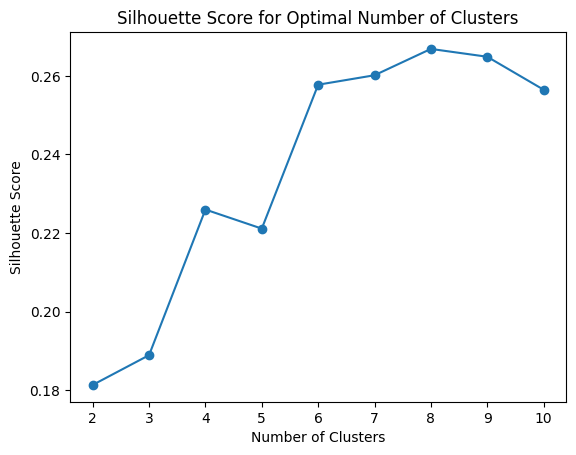

In [30]:
from sklearn.metrics import silhouette_score

# Function to find the optimal number of clusters using silhouette score
def find_optimal_clusters_silhouette(data):
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot the silhouette scores
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Find optimal clusters for Model 1
find_optimal_clusters_silhouette(scaled_data_model1)

## Fixed Clustering

In [31]:
# Create a pipeline for K-means clustering
def kmeans_pipeline(data, n_clusters, pca_components):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=pca_components)),
        ('kmeans', KMeans(n_clusters=n_clusters, n_init=10, random_state=42))
    ])
    return pipeline.fit(data)

# Model 1:
n_clusters_model1 = 4
pca_components_model1 = 7
kmeans_model1 = kmeans_pipeline(scaled_data_model1, n_clusters_model1, pca_components_model1)
model1_labels = kmeans_model1.predict(scaled_data_model1)

## Model1 Exploration (Genres based)

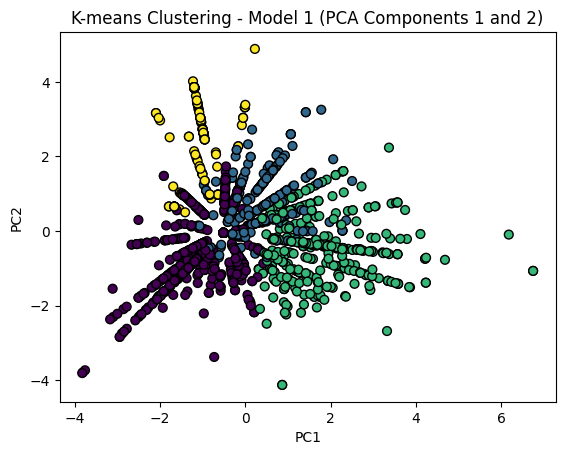

In [32]:
plt.scatter(model1_data[:, 0], model1_data[:, 1], c=model1_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('K-means Clustering - Model 1 (PCA Components 1 and 2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [33]:
import plotly.express as px

# Assuming model1_data is the PCA-transformed data and model1_labels are the cluster labels
fig = px.scatter_3d(x=model1_data[:, 0], y=model1_data[:, 1], z=model1_data[:, 2], color=model1_labels,
                    color_continuous_scale='Viridis', opacity=0.7, size_max=10,
                    labels={'color': 'Cluster'})
fig.update_layout(scene=dict(aspectmode="cube"))

# Show the plota
fig.show()

In [34]:
# Exploration for each cluster in Model 1
for cluster in np.unique(model1_labels):
    cluster_data = df[model1_labels == cluster]
    print(f"Cluster {cluster} Exploration:")
    
    # Number of data points in the cluster
    print(f"Number of Data Points: {len(cluster_data)}")

    print("\nSample Anime Titles:")
    sample_titles = cluster_data['Name'].head(10)
    print(sample_titles)

Cluster 0 Exploration:
Number of Data Points: 667

Sample Anime Titles:
1         Fruits Basket the Final Season
10                            your name.
14                        A Silent Voice
15               Violet Evergarden Movie
17    Heaven Official's Blessing Special
19                                 Given
24                     Mob Psycho 100 II
26              Fruits Basket 2nd Season
30            Heaven Official's Blessing
34                   Clannad After Story
Name: Name, dtype: object
Cluster 1 Exploration:
Number of Data Points: 301

Sample Anime Titles:
5                                  Jujutsu Kaisen
20        Code Geass: Lelouch of the Rebellion R2
22                        Gintama: The Very Final
27                         The Promised Neverland
33          Gintama.: Shirogane no Tamashii-hen 2
36                            Gintama': Enchousen
39    Gintama Kanketsu-hen: Yorozuya yo Eien Nare
40                                       Gintama.
41            Gintam

In [35]:
# Add cluster labels to the DataFrame
df['Cluster_model1'] = model1_labels

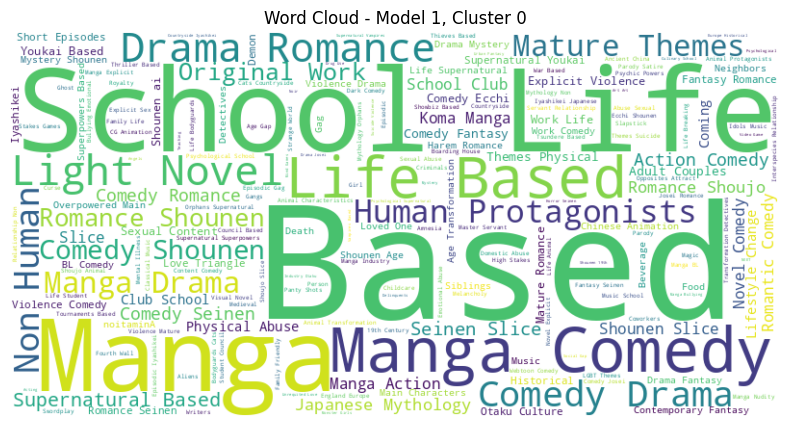

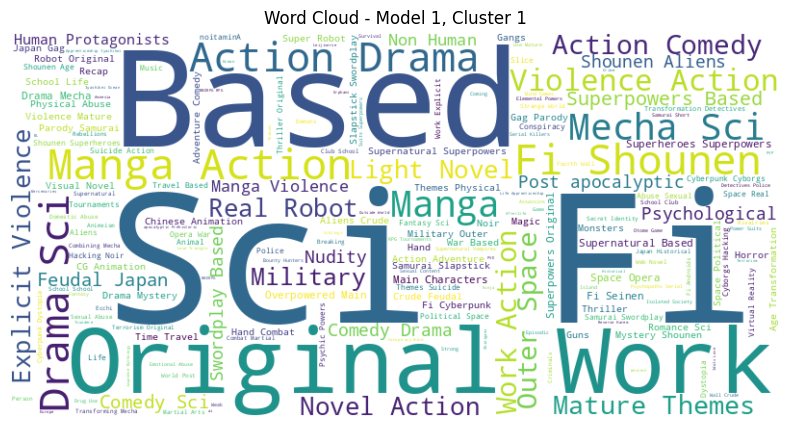

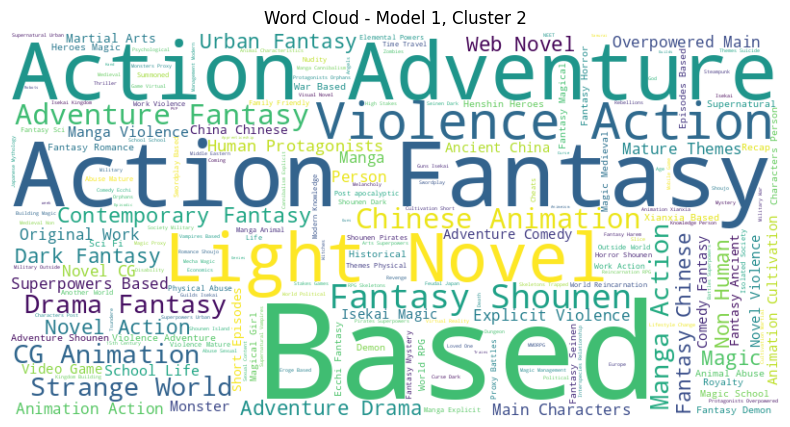

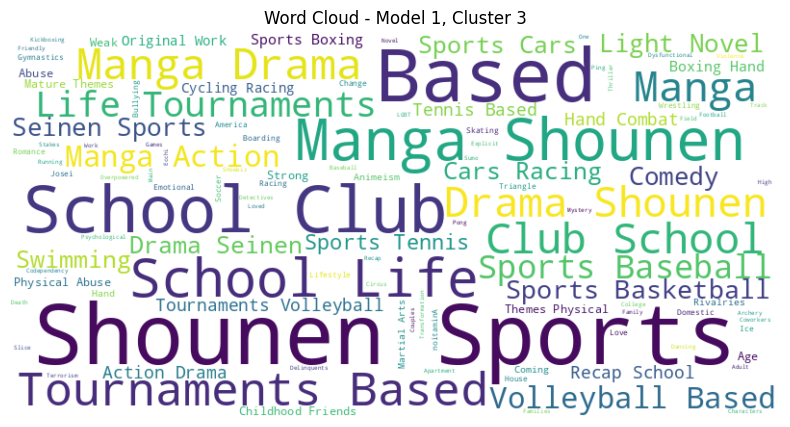

In [36]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Function to generate and display a word cloud for genres in a specific cluster
def generate_wordcloud(df, cluster, title, cluster_column):
    cluster_data = df[df[cluster_column] == cluster]
    
    genres_text = ' '.join(cluster_data['Genres'].apply(custom_tokenizer).explode())

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and display word clouds for each cluster in Model 1
cluster_column = 'Cluster_model1'
for cluster in np.unique(model1_labels):
    title = f'Word Cloud - Model 1, Cluster {cluster}'
    generate_wordcloud(df, cluster, title, cluster_column)

## Anime Recommender system

In [37]:
from fuzzywuzzy import process

# Function to recommend anime based on input title
def anime_recommendation_system(input_title, cluster_column, df):
    # Use fuzzy matching to find the closest matching anime title
    result = process.extractOne(input_title, df['Name'])
    match, score = result[0], result[1]

    print(f"\nInput title: {input_title}")
    print(f"Did you mean this anime : \n{match}")

    # Retrieve the cluster of the closest matching anime
    closest_anime_id = df[df['Name'] == match].index
    closest_anime_cluster = df.loc[closest_anime_id, cluster_column].values[0]

    # Filter recommendations from the same cluster as the closest matching anime
    cluster_mask = (df[cluster_column] == closest_anime_cluster)
    cluster_animes = df[cluster_mask]['Name'].tolist()

    # Display 10 recommendations from the same cluster
    print("\nHere are 10 recommendations from the same category:")
    recommendations = random.sample(cluster_animes, min(10, len(cluster_animes)))
    for idx, anime in enumerate(recommendations, start=1):
        print(f"{idx}. {anime}")

# Example usage
user_input = input("Enter the title of an anime based on Genres: ")
anime_recommendation_system(user_input, 'Cluster_model1', df) 

/home/arvn/datageek/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning




Input title: haikyu
Did you mean this anime : 
Haikyuu!!

Here are 10 recommendations from the same category:
1. Initial D Legend 2: Racer
2. Hajime no Ippo: Champion Road
3. Yowamushi Pedal: New Generation
4. Initial D Final Stage
5. The Prince of Tennis: Another Story - Kako to Mirai no Message
6. Haikyuu!! Movie 3: Talent and Sense
7. Hajime no Ippo: Mashiba vs Kimura
8. Free! Road to the World - Yume
9. Kaleido Star
10. Cross Game


## Save Model for Deployments

In [40]:
import joblib

joblib.dump(kmeans_model1, 'kmeans_model1.pkl')

['kmeans_model1.pkl']